In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db',
                                      mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz', num_factors=20, embedding_dim=2)

10/03/2018 15:56:32 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_4.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/03/2018 15:56:35 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_20.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/03/2018 15:56:38 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_5.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/03/2018 15:56:41 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_17.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/03/2018 15:56:44 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_3.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/03/2018 15:56:48 Loading Nifti image /data/eli/synthetic_data/nifti_files/s

In [6]:
dtfa.normalize_activations()

[tensor(13.7819),
 tensor(11.8878),
 tensor(12.8600),
 tensor(11.1877),
 tensor(12.2424),
 tensor(13.1142),
 tensor(13.6709),
 tensor(14.4474),
 tensor(12.4188),
 tensor(12.3729),
 tensor(16.5108),
 tensor(13.5133),
 tensor(12.4866),
 tensor(13.8866),
 tensor(14.5202),
 tensor(11.0888),
 tensor(16.0532),
 tensor(11.7258),
 tensor(11.5685),
 tensor(11.2842)]

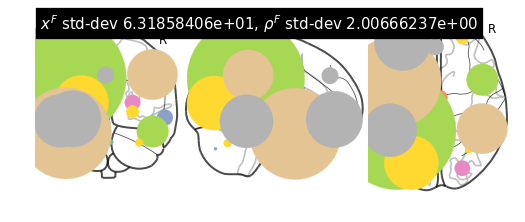

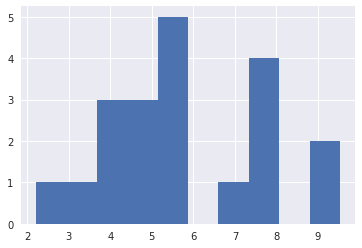

(<nilearn.plotting.displays.OrthoProjector at 0x7f34c00be5f8>,
 tensor([[ -0.6815, -23.2000,  10.3638],
         [ -2.8014,  18.4756, -14.3561],
         [  2.1303, -27.3002, -34.1265],
         [  2.4766,  -9.4130,  55.7515],
         [-43.3911,   4.8943,  32.4908],
         [ 59.5556, -37.0430,  -8.4706],
         [-23.3904, -76.3971, -40.6536],
         [ 50.0383,   8.2607,  32.8198],
         [ 25.4966, -83.8138,   7.3874],
         [  7.3152, -69.6085,  41.2407],
         [-43.0013, -44.4863,  33.6280],
         [ 46.6286,   9.3702, -23.0669],
         [-28.2533, -77.9336,   7.5004],
         [ 25.4904,  53.3734,  -2.2970],
         [ 32.5164, -63.6532, -34.7943],
         [-44.7116,   7.4622, -24.9158],
         [ 46.3876, -42.0153,  36.8836],
         [ -2.8477,  44.0071,  36.2222],
         [-37.3617,  48.6485,  -9.7672],
         [-50.3729, -43.7617, -11.7907]]),
 tensor([ 3.9003,  4.4474,  3.5362,  5.3021,  5.0761,  5.5460,  2.2095,
          5.4894,  5.4757,  3.7053,  9.5325

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=9, patience=50, checkpoint_steps=100)

10/03/2018 15:58:18 [Epoch 1] (5440ms) Posterior free-energy 5.96487834e+09 = KL from prior 4.58244750e+05 - log-likelihood -5.96442061e+09
10/03/2018 15:58:18 Saving checkpoint...
10/03/2018 15:58:23 [Epoch 2] (4605ms) Posterior free-energy 5.28915814e+09 = KL from prior 4.01924500e+05 - log-likelihood -5.28875622e+09
10/03/2018 15:58:27 [Epoch 3] (4529ms) Posterior free-energy 8.44114278e+09 = KL from prior 3.62510062e+05 - log-likelihood -8.44078029e+09
10/03/2018 15:58:32 [Epoch 4] (4440ms) Posterior free-energy 2.41453875e+09 = KL from prior 3.55348781e+05 - log-likelihood -2.41418317e+09
10/03/2018 15:58:36 [Epoch 5] (4430ms) Posterior free-energy 1.64919539e+09 = KL from prior 3.47189312e+05 - log-likelihood -1.64884813e+09
10/03/2018 15:58:41 [Epoch 6] (4420ms) Posterior free-energy 1.79324160e+09 = KL from prior 3.28086219e+05 - log-likelihood -1.79291341e+09
10/03/2018 15:58:45 [Epoch 7] (4458ms) Posterior free-energy 1.22440320e+09 = KL from prior 3.15426750e+05 - log-likeli

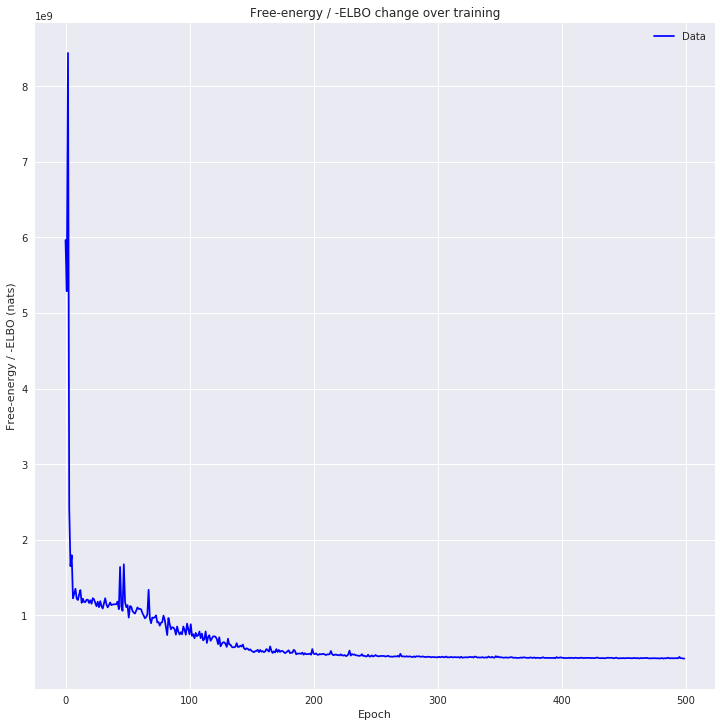

In [9]:
utils.plot_losses(losses)

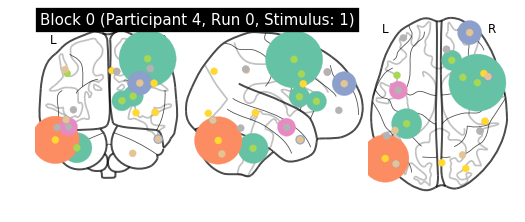

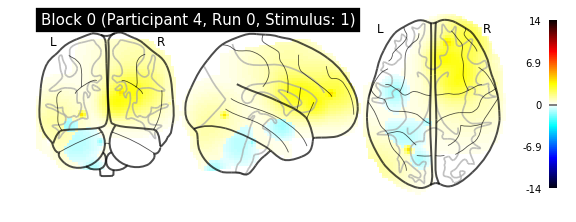

10/03/2018 16:35:55 Reconstruction Error (Frobenius Norm): 2.00146130e+03 out of 5.91962988e+03


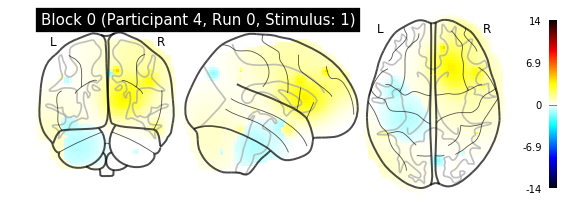

{'weights': tensor([[ 1.7910e+00,  2.1677e+00, -1.1958e+00,  ..., -2.9506e+00,
          3.5416e-01,  1.0766e+00],
        [ 4.2753e+00,  5.2228e+00, -3.8117e+00,  ...,  3.3170e+00,
          9.5979e-01,  5.4382e-01],
        [-7.0601e-01,  3.5225e+00,  1.6771e+00,  ...,  3.0643e+00,
          1.6072e+00,  2.6413e+00],
        ...,
        [ 2.4569e+00,  2.2402e+00, -1.7897e-01,  ...,  1.0888e+00,
         -4.1335e-01,  1.7626e-01],
        [ 1.5196e+00,  4.1804e+00, -5.1455e-02,  ...,  6.2081e+00,
          6.5707e-01, -1.6827e-01],
        [ 3.5768e+00,  1.8005e-01,  1.2061e-01,  ...,  6.0086e+00,
          3.1908e-01,  9.0860e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0196,  0.0150,  0.0112,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

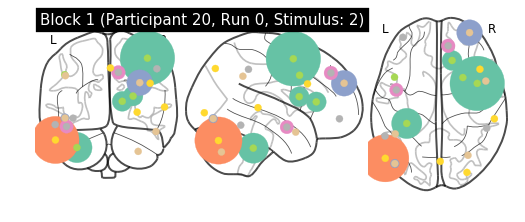

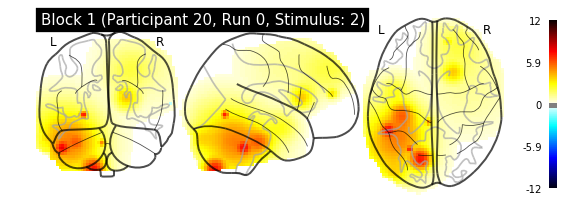

10/03/2018 16:36:46 Reconstruction Error (Frobenius Norm): 2.39120996e+03 out of 7.57596680e+03


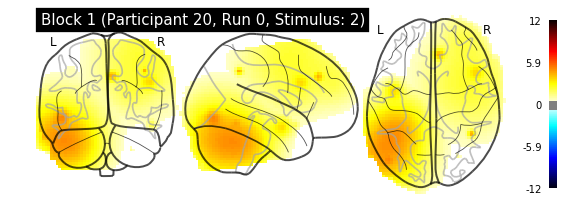

{'weights': tensor([[-1.6206e-01,  5.4810e-01,  5.1044e+00,  ..., -1.4497e+00,
         -1.1842e+00, -1.0675e+00],
        [ 2.1919e-01,  1.2056e-02,  8.6974e-01,  ...,  4.6006e+00,
         -4.5438e-01, -3.3296e+00],
        [-1.2064e-01, -2.5759e+00,  5.1954e+00,  ...,  3.8899e+00,
          1.6998e+00,  3.4633e+00],
        ...,
        [ 2.4371e+00, -9.7428e-01,  5.6876e+00,  ...,  3.5022e+00,
          2.5807e-02,  2.6221e-01],
        [ 1.0761e+00,  6.7025e-02,  1.0263e+00,  ...,  5.3934e+00,
         -1.0479e+00, -2.0570e+00],
        [ 9.6688e-01,  1.8340e+00,  4.8586e+00,  ...,  6.1001e+00,
          1.5567e+00,  1.6456e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0225,  0.0173,  0.0131,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

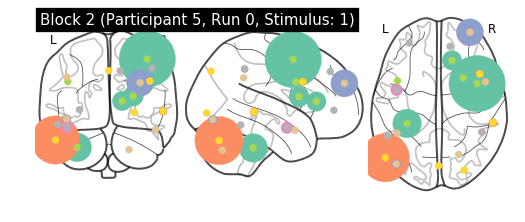

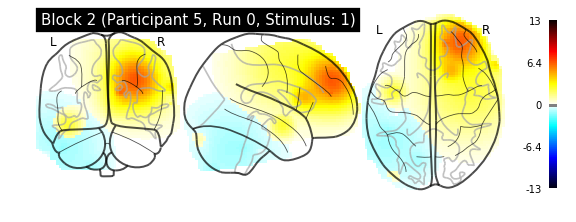

10/03/2018 16:37:37 Reconstruction Error (Frobenius Norm): 2.29177490e+03 out of 6.12725391e+03


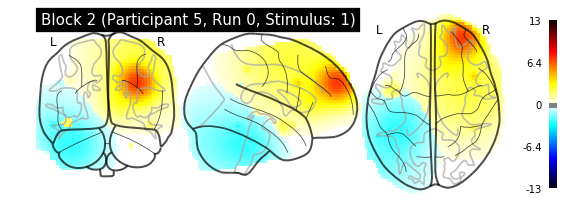

{'weights': tensor([[-4.1110e-01,  2.1437e+00, -8.6820e-01,  ...,  3.5463e+00,
          3.3742e-01, -9.1439e-01],
        [ 1.5625e+00,  1.2861e+00,  1.4358e+00,  ...,  6.9188e-01,
          8.0338e-01,  1.4569e+00],
        [ 7.1234e+00,  1.3032e+00,  1.0521e+00,  ...,  5.9778e+00,
          1.3839e+00, -8.8889e-01],
        ...,
        [ 4.8474e+00,  3.6284e+00, -5.2313e-02,  ...,  2.1701e+00,
          1.7436e+00,  1.2365e+00],
        [ 3.8870e+00,  5.2343e+00, -6.2552e-01,  ...,  1.8837e+00,
          3.2213e-01, -8.2654e-01],
        [ 3.1532e+00,  3.4696e+00,  1.2590e-01,  ...,  2.6774e+00,
          1.3064e-01, -2.4011e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0362,  0.0288,  0.0225,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

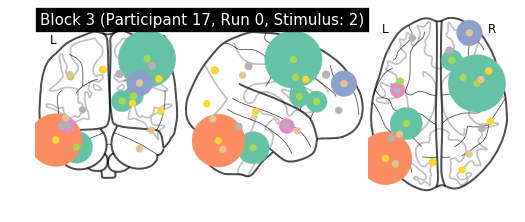

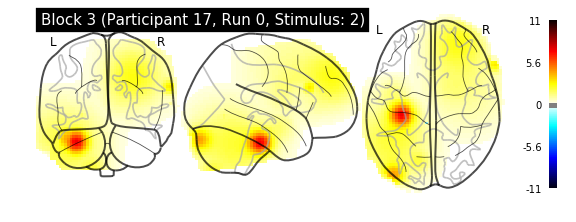

10/03/2018 16:38:28 Reconstruction Error (Frobenius Norm): 2.18032690e+03 out of 6.15246875e+03


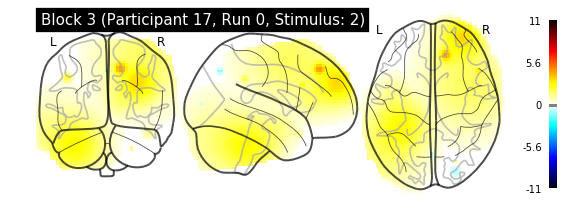

{'weights': tensor([[ -0.4692,  -0.3768,   2.5033,  ...,   4.8320,  -1.5591,
           2.2993],
        [  0.3264,   0.4502,   5.3257,  ...,   3.6070,   1.8176,
          -0.7366],
        [  0.0540,   1.9263,   4.4015,  ...,   3.3706,   0.3913,
          -2.0570],
        ...,
        [  2.3006,  -0.2444,   2.4905,  ...,  -1.1241,  -2.0392,
           3.4507],
        [  1.3933,  -0.6042,   0.3964,  ...,   3.0036,  -1.5721,
           0.9108],
        [  2.2267,  -2.4181,   2.3608,  ...,   2.5327,   1.4236,
           1.5083]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0246,  0.0191,  0.0145,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers':

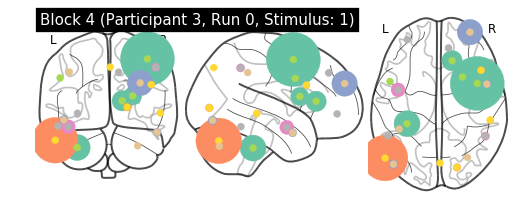

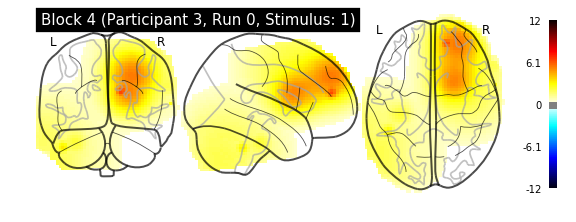

10/03/2018 16:39:18 Reconstruction Error (Frobenius Norm): 2.28021460e+03 out of 6.53506689e+03


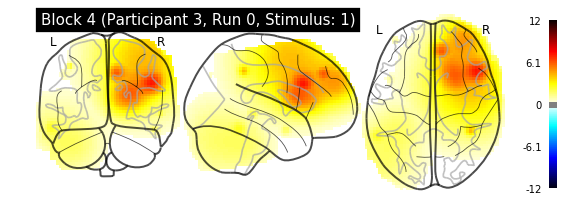

{'weights': tensor([[ 3.9550e+00,  2.6231e+00,  2.3113e+00,  ...,  2.1702e+00,
          4.7816e-01, -7.5154e-01],
        [-1.7272e-01,  4.3088e+00,  1.7528e+00,  ...,  4.0847e+00,
         -6.2861e-01, -1.1843e+00],
        [ 1.5904e+00,  2.5139e+00, -8.8387e-01,  ...,  5.2058e+00,
          6.8847e-01,  1.3502e+00],
        ...,
        [ 5.1845e-01,  2.5154e+00,  2.2245e+00,  ...,  2.4778e+00,
         -6.1372e-01,  1.2557e+00],
        [ 2.2398e+00, -1.3985e+00, -7.6608e-01,  ...,  2.4850e+00,
         -5.3200e-01,  4.3819e-01],
        [ 2.5645e+00,  4.2278e+00, -1.1933e+00,  ...,  4.7590e+00,
         -6.1822e-01,  8.7193e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0319,  0.0251,  0.0195,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

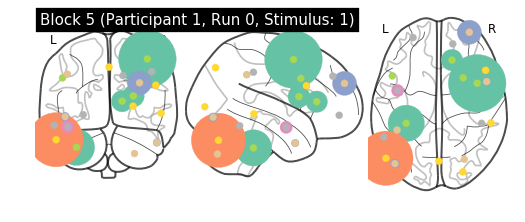

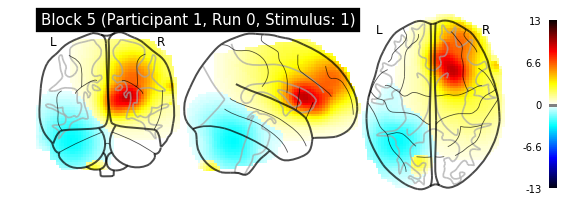

10/03/2018 16:40:08 Reconstruction Error (Frobenius Norm): 2.03864868e+03 out of 6.41621094e+03


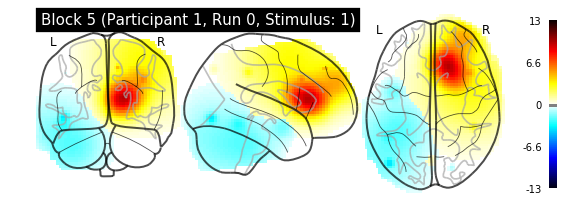

{'weights': tensor([[ 4.4288e+00,  6.9255e+00, -1.9662e-01,  ...,  4.6105e+00,
          3.1039e-01, -2.2280e+00],
        [ 2.1277e+00,  1.3039e+00, -1.0348e+00,  ...,  3.8399e+00,
         -3.1104e-01, -2.9846e+00],
        [ 2.3206e+00,  3.4961e+00,  2.0393e-01,  ...,  8.6721e-01,
         -1.2008e-02,  1.8022e-01],
        ...,
        [ 3.8240e+00,  3.2792e+00,  4.3721e-01,  ..., -1.0703e-01,
          7.0401e-01, -2.6050e-01],
        [ 9.1443e-01,  2.5510e-01,  1.7086e+00,  ...,  4.3503e+00,
          2.0999e-01, -1.2639e+00],
        [ 1.8249e+00,  2.4580e+00, -3.2982e+00,  ...,  1.6302e+00,
          7.2922e-01, -5.2823e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0276,  0.0215,  0.0165,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

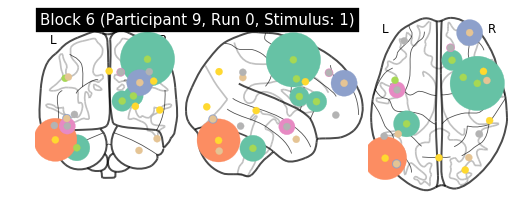

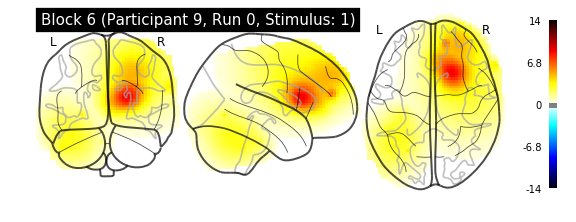

10/03/2018 16:40:58 Reconstruction Error (Frobenius Norm): 2.04776672e+03 out of 6.96013916e+03


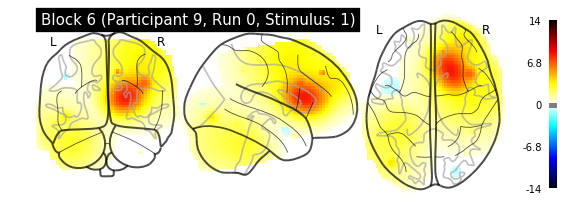

{'weights': tensor([[ 4.6514e+00,  3.7314e+00,  2.1460e+00,  ...,  2.5776e+00,
          5.6458e-01,  6.8418e-01],
        [ 2.0236e+00,  5.6611e+00,  1.9132e+00,  ...,  4.3278e+00,
          3.1673e-01,  1.8468e+00],
        [ 3.2155e+00,  4.7742e+00, -4.5809e-01,  ...,  3.5899e+00,
          3.3456e+00,  1.2794e+00],
        ...,
        [-2.2766e-01,  5.6020e+00, -2.9695e+00,  ...,  1.4777e+00,
         -1.4422e+00,  2.6724e+00],
        [ 1.9316e+00,  2.2309e+00,  5.1918e-01,  ...,  4.8348e+00,
         -5.1612e-01,  5.7614e-01],
        [ 1.7703e+00,  6.3686e+00, -1.2503e+00,  ...,  3.8665e+00,
          1.5975e+00,  1.1306e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0093,  0.0068,  0.0048,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

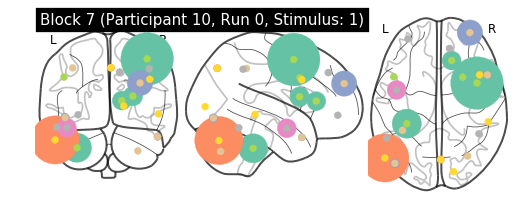

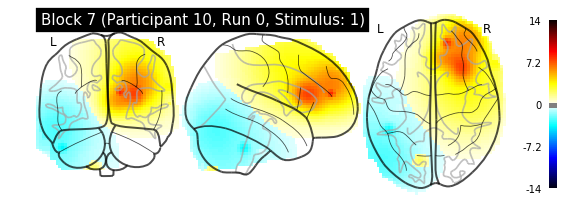

10/03/2018 16:41:48 Reconstruction Error (Frobenius Norm): 2.24529346e+03 out of 7.99037549e+03


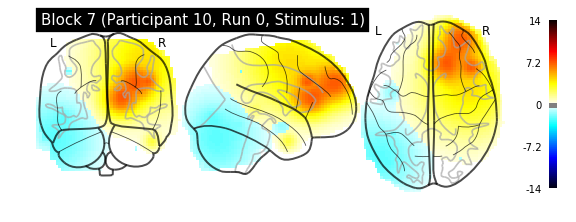

{'weights': tensor([[ 1.7826e+00,  4.0796e+00, -1.6694e-01,  ...,  3.3028e+00,
         -6.1084e-01, -5.1138e-01],
        [ 2.3247e+00,  3.7262e+00,  1.7147e-01,  ...,  4.1979e+00,
          9.9768e-01, -5.7900e-01],
        [ 5.3829e+00,  4.7107e+00,  8.9173e-01,  ...,  3.2272e+00,
          2.3060e+00,  5.6844e-01],
        ...,
        [ 2.7899e+00,  1.7740e+00, -7.7790e-02,  ...,  3.0819e+00,
          4.9512e-01,  1.1872e+00],
        [ 2.0034e+00,  6.7368e+00,  9.0157e-01,  ...,  7.4619e+00,
          1.0220e-02,  2.4100e-01],
        [ 5.2142e+00,  1.7565e+00,  2.7354e+00,  ...,  6.4891e+00,
          1.3070e+00, -1.2921e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0133,  0.0099,  0.0071,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

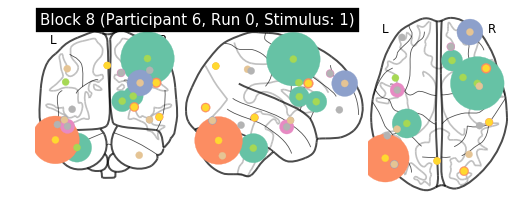

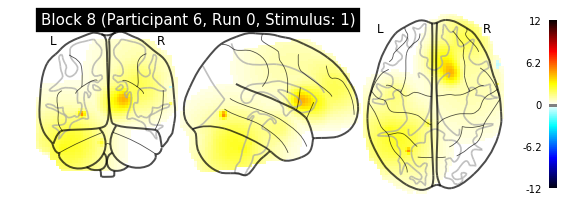

10/03/2018 16:42:39 Reconstruction Error (Frobenius Norm): 2.06131763e+03 out of 5.98447900e+03


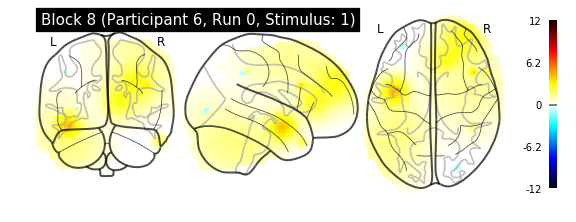

{'weights': tensor([[-1.6737e+00,  4.7657e+00,  7.5114e-01,  ...,  7.7032e-01,
          3.1435e-01,  8.1298e-01],
        [ 2.3091e+00,  2.1164e+00,  9.4884e-01,  ...,  1.9296e+00,
         -2.1831e-01,  2.2029e+00],
        [ 5.6133e+00,  7.1910e-01, -5.2645e-01,  ...,  2.1176e+00,
          4.0478e-01,  8.3409e-01],
        ...,
        [ 5.0809e+00,  3.3944e+00,  1.1092e+00,  ...,  4.1283e+00,
          1.4947e+00, -5.3252e-01],
        [ 4.4747e+00,  2.2640e+00, -1.0424e+00,  ...,  1.6482e+00,
         -2.1559e-01,  1.4535e+00],
        [ 4.4119e+00,  3.1403e-01,  1.0775e+00,  ...,  1.5282e+00,
          4.7257e-01, -2.0906e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0232,  0.0179,  0.0135,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

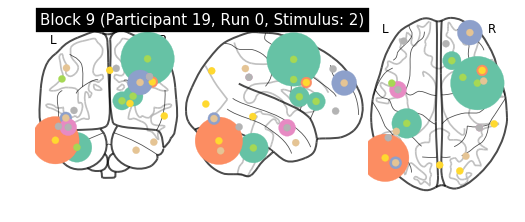

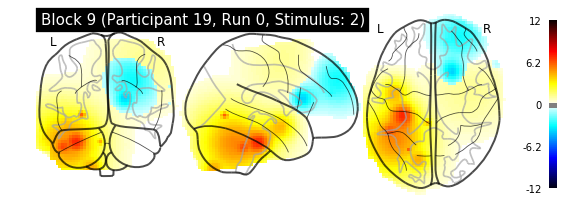

10/03/2018 16:43:31 Reconstruction Error (Frobenius Norm): 2.11422705e+03 out of 6.23607080e+03


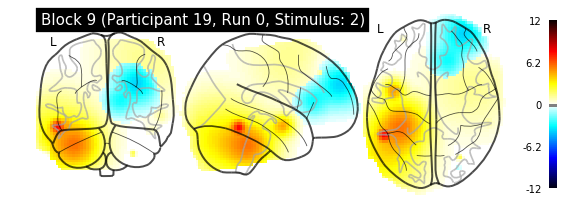

{'weights': tensor([[-1.4616e+00, -1.8272e+00,  3.4453e+00,  ..., -2.6014e+00,
          2.2559e-01,  3.1149e+00],
        [-1.2567e-01, -5.9830e-01,  3.0990e+00,  ...,  3.5950e-01,
          1.4510e-01,  2.7208e+00],
        [-2.0859e+00, -2.0600e+00, -1.8049e+00,  ...,  6.3781e-01,
          3.5201e-01,  4.9789e+00],
        ...,
        [ 2.6974e+00,  2.0426e+00,  6.0223e+00,  ...,  7.6387e-01,
          7.2410e-01,  3.4269e+00],
        [-1.0014e+00, -8.0171e-01,  1.0338e+00,  ...,  6.2231e-01,
         -5.3018e-01,  2.0601e+00],
        [-7.9059e-01, -1.7198e+00,  2.5224e+00,  ..., -6.1402e-02,
         -1.6237e+00,  1.6873e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0755,  0.0630,  0.0519,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

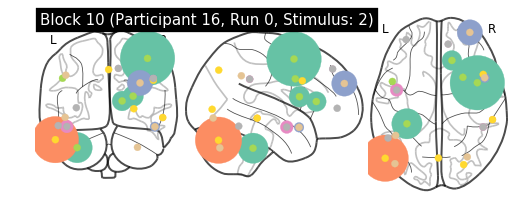

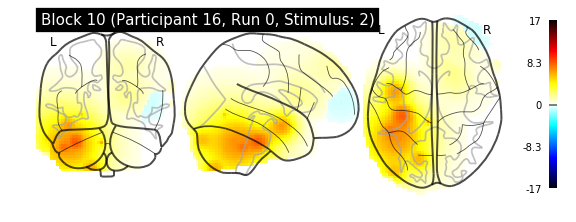

10/03/2018 16:44:21 Reconstruction Error (Frobenius Norm): 2.17879443e+03 out of 9.26213965e+03


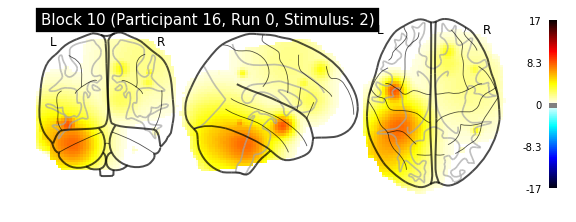

{'weights': tensor([[ 4.4155e-01,  1.5613e+00,  6.0614e+00,  ...,  1.8398e+00,
          1.0950e+00,  9.4194e-01],
        [-4.0440e+00,  2.1136e-01,  1.6023e+00,  ..., -3.7663e+00,
          2.6570e+00,  3.5657e+00],
        [-1.4615e-01, -6.5244e-01,  2.8027e+00,  ...,  1.0799e+00,
         -3.3083e+00,  3.1614e+00],
        ...,
        [ 1.6429e+00, -1.6435e+00,  4.3726e+00,  ...,  3.4315e+00,
         -6.4976e-01,  2.4570e+00],
        [ 3.2705e-01,  1.6106e-01,  3.9025e+00,  ...,  1.9928e+00,
         -2.9639e-01,  2.2419e+00],
        [ 2.7771e+00,  3.6195e+00,  3.8409e+00,  ...,  3.1000e+00,
          1.4458e+00,  1.7228e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0233,  0.0180,  0.0136,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

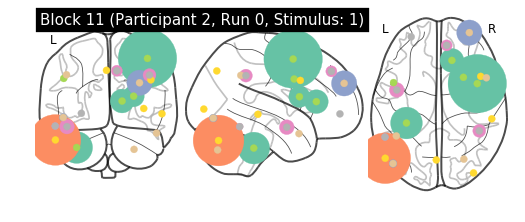

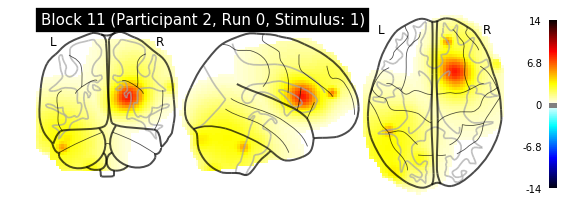

10/03/2018 16:45:12 Reconstruction Error (Frobenius Norm): 2.04220508e+03 out of 6.05434961e+03


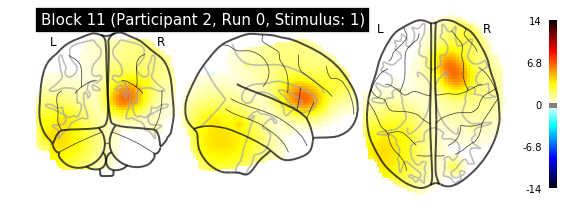

{'weights': tensor([[ 4.1834e+00,  2.3723e+00,  1.0849e+00,  ...,  2.3165e+00,
          9.3255e-01,  1.4209e+00],
        [ 2.9225e+00,  2.8098e+00, -1.0941e+00,  ...,  4.8654e+00,
         -7.9184e-01, -2.2306e+00],
        [ 3.7932e+00,  8.3552e-01,  2.0745e-01,  ...,  1.9801e+00,
          1.2319e+00,  3.2044e+00],
        ...,
        [ 2.8914e+00,  3.2922e+00,  1.4374e+00,  ...,  1.2241e-01,
         -1.8316e+00, -5.3086e-01],
        [ 2.4708e+00,  1.6311e+00, -2.2038e+00,  ...,  5.1404e-01,
         -1.0105e+00, -3.6707e+00],
        [ 7.2545e+00,  3.5253e+00,  5.6550e-01,  ..., -1.5610e+00,
         -1.0806e-01,  2.1839e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0147,  0.0110,  0.0080,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

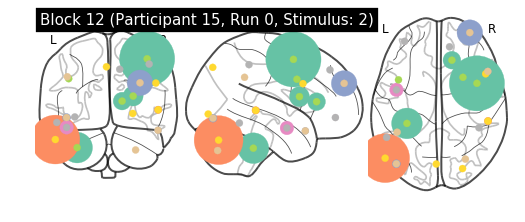

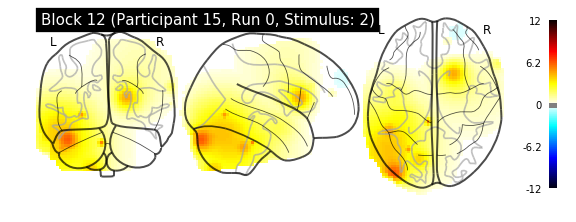

10/03/2018 16:46:03 Reconstruction Error (Frobenius Norm): 2.06407837e+03 out of 7.18119434e+03


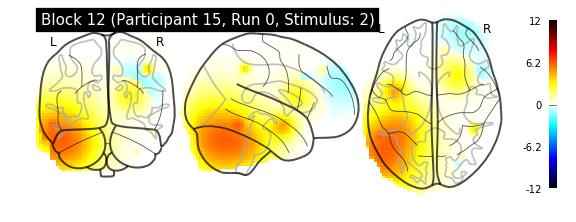

{'weights': tensor([[ 1.3109,  0.1892,  2.2084,  ..., -0.0450,  1.5074,  1.1838],
        [-1.4648,  0.1270,  1.5844,  ...,  0.2027, -2.4795,  1.4844],
        [-2.1823, -1.1224,  4.9467,  ...,  2.7661, -1.2669,  4.6131],
        ...,
        [ 3.0170,  0.7717,  2.8180,  ...,  0.2362, -0.3206,  5.0031],
        [ 0.7051, -2.0076,  3.8119,  ...,  3.8196,  2.4860,  2.3639],
        [ 0.9334,  1.1059,  3.0844,  ..., -0.1541, -1.2739,  2.7843]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0222,  0.0171,  0.0128,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 26.0642,  11.9971,  14.0944],
        [ 14.4949,  29.5156,   9.4436],
        [

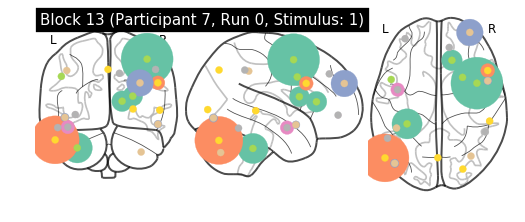

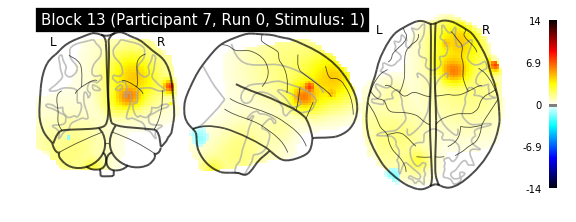

10/03/2018 16:46:54 Reconstruction Error (Frobenius Norm): 2.10878223e+03 out of 6.34869141e+03


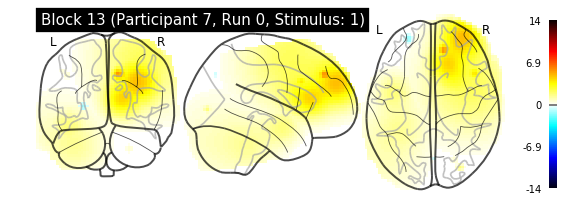

{'weights': tensor([[ 1.3832e+00,  4.1701e+00,  2.1787e+00,  ...,  9.1892e-01,
          1.4802e+00,  2.8380e-01],
        [ 7.3136e-01,  4.4307e+00,  1.6458e+00,  ..., -6.6961e-01,
          4.0569e-01, -6.2419e-01],
        [ 4.4560e+00,  1.6882e+00,  1.1249e+00,  ...,  4.0792e+00,
          5.1537e-01,  4.7196e+00],
        ...,
        [ 4.2486e+00,  3.1206e+00,  1.9725e+00,  ...,  1.7351e+00,
         -1.2829e+00, -2.1501e-01],
        [ 3.5382e+00,  3.0084e+00,  1.1713e+00,  ...,  4.1635e+00,
          3.4853e-01,  1.9072e+00],
        [ 2.4528e+00,  2.5367e+00, -1.5556e+00,  ...,  1.3994e+00,
         -1.6383e+00,  4.6634e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0145,  0.0108,  0.0079,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

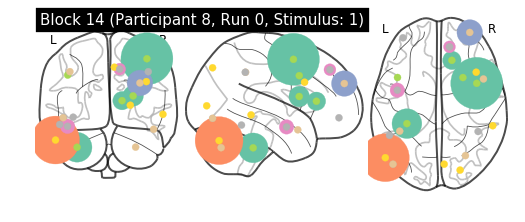

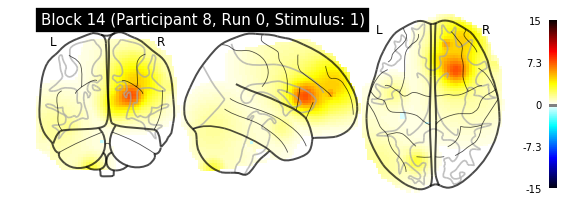

10/03/2018 16:47:43 Reconstruction Error (Frobenius Norm): 2.12690601e+03 out of 7.89253857e+03


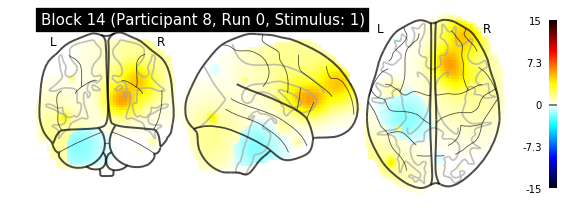

{'weights': tensor([[ 3.3479e+00,  3.7682e+00, -4.6747e-01,  ...,  1.4713e+00,
         -1.0003e+00, -1.2788e+00],
        [ 3.7040e+00,  3.3689e+00, -3.2241e+00,  ...,  3.9952e+00,
         -2.4935e+00, -1.1375e+00],
        [ 4.3918e+00,  3.5021e+00,  1.4381e+00,  ...,  3.8409e-01,
          2.1818e-01,  4.0764e+00],
        ...,
        [ 4.3965e+00,  6.4882e+00,  1.3260e+00,  ...,  6.5276e+00,
          2.0484e+00,  9.2901e-01],
        [ 3.5418e+00,  3.2302e+00,  2.2879e-01,  ...,  2.8872e+00,
         -2.4582e-02,  3.3923e-01],
        [ 2.8913e+00,  4.8463e+00,  9.6261e-02,  ...,  5.1619e+00,
         -1.0632e+00,  1.2699e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0262,  0.0203,  0.0155,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

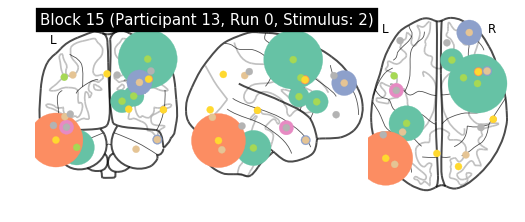

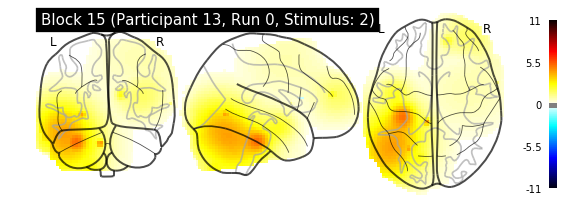

10/03/2018 16:48:33 Reconstruction Error (Frobenius Norm): 2.05247998e+03 out of 5.48174072e+03


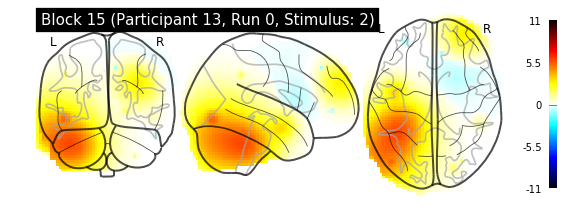

{'weights': tensor([[-1.1932e+00, -4.4118e-01,  2.6151e+00,  ..., -3.4161e+00,
         -2.8887e+00,  8.4568e-01],
        [-1.4584e+00,  6.3548e-01,  1.4403e+00,  ..., -3.3785e-01,
          8.5558e-01, -6.8611e-01],
        [ 1.6550e+00,  1.1348e+00,  1.5109e+00,  ..., -1.2167e+00,
         -2.5161e+00,  5.2522e+00],
        ...,
        [ 2.3914e+00, -3.1290e-01,  4.0343e+00,  ..., -1.7364e-01,
         -6.8831e-01,  1.7266e+00],
        [ 2.6891e-01,  7.4597e-01,  3.2047e+00,  ...,  2.1011e-01,
          1.8945e-01,  1.3057e+00],
        [ 7.7617e-01, -1.3459e+00,  1.1459e+00,  ..., -9.8827e-01,
         -4.1875e-02,  3.8086e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0159,  0.0119,  0.0088,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

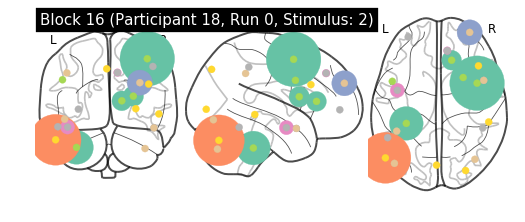

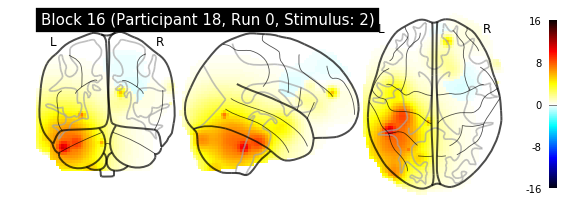

10/03/2018 16:49:23 Reconstruction Error (Frobenius Norm): 2.23685547e+03 out of 1.02790820e+04


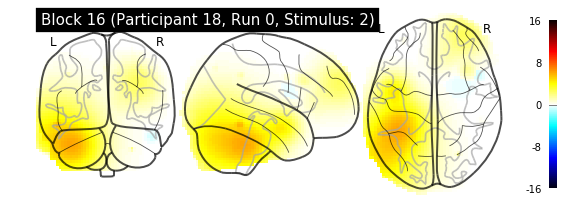

{'weights': tensor([[-2.3260e+00,  2.4687e+00,  5.4713e+00,  ..., -7.9279e-01,
         -1.0289e+00,  1.6867e+00],
        [-2.0840e-01,  8.0551e-01,  5.0785e+00,  ..., -2.5336e-01,
         -1.6896e+00,  1.7698e+00],
        [-2.9849e-01,  3.4796e+00,  2.8937e+00,  ..., -1.6202e+00,
          2.9120e+00,  4.1182e+00],
        ...,
        [-1.8611e+00, -3.1798e+00,  4.1484e+00,  ...,  1.3749e+00,
         -3.4754e+00,  1.7563e+00],
        [ 5.7573e-01,  1.7514e-01,  3.8474e+00,  ..., -1.5755e+00,
          1.3725e+00,  9.5349e-01],
        [ 3.0021e+00,  2.9348e-01,  5.9066e+00,  ...,  3.9540e+00,
          1.7193e+00,  4.2689e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0329,  0.0259,  0.0201,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

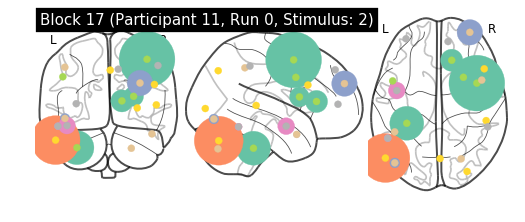

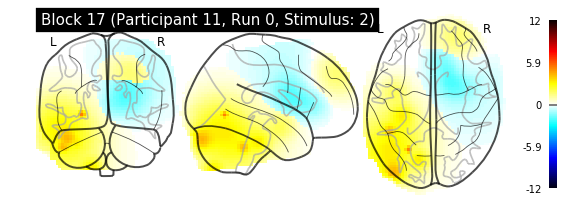

10/03/2018 16:50:14 Reconstruction Error (Frobenius Norm): 2.06138647e+03 out of 5.44554590e+03


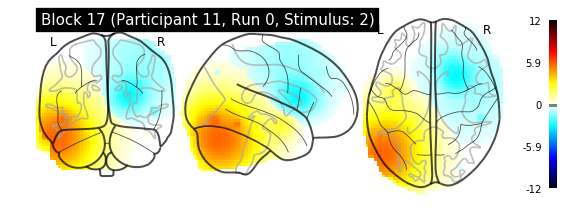

{'weights': tensor([[-3.3101e+00, -8.4218e-01,  1.1982e+00,  ...,  4.8314e+00,
          1.5815e+00,  1.1589e+00],
        [-1.3140e+00,  4.8777e-01,  1.9650e+00,  ..., -1.7560e+00,
          2.0387e-02, -9.1839e-01],
        [-2.9150e+00, -1.7709e-01, -1.4130e-01,  ...,  1.3159e+00,
          2.0584e+00,  8.8143e-01],
        ...,
        [-5.6295e-01,  1.7875e-01,  1.5858e+00,  ..., -7.2709e-01,
         -2.3117e+00,  4.0648e-01],
        [ 2.3936e+00,  9.6036e-01,  2.8540e+00,  ...,  2.3006e+00,
         -2.4165e-01, -1.0056e-01],
        [ 5.1471e-01, -3.7921e+00,  1.3049e+00,  ..., -5.4597e-01,
         -1.2980e+00,  3.3070e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0565,  0.0463,  0.0374,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

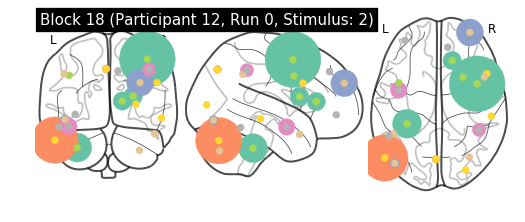

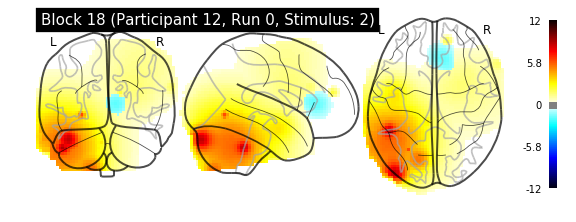

10/03/2018 16:51:05 Reconstruction Error (Frobenius Norm): 2.10544751e+03 out of 6.36352539e+03


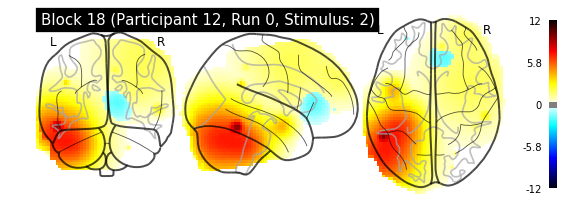

{'weights': tensor([[ 9.1572e-01, -3.8559e+00,  2.5738e+00,  ...,  6.3482e-01,
         -3.9094e-01, -8.3192e-01],
        [-1.0756e+00, -3.6419e+00,  1.4003e-01,  ...,  7.3912e-01,
          6.4623e-01,  3.4483e-01],
        [ 3.5890e+00,  1.8364e-01,  2.8413e+00,  ...,  1.1228e+00,
         -7.2889e-01, -1.9900e+00],
        ...,
        [-4.1316e-01, -3.0060e-01,  9.7717e-01,  ...,  1.7681e-01,
          7.9096e-01,  2.6920e+00],
        [ 1.3556e+00,  3.0937e+00,  3.3457e+00,  ..., -8.1932e-01,
          5.0060e-01,  1.0296e+00],
        [-9.9436e-01,  5.5940e-01,  3.2229e+00,  ...,  1.3459e+00,
          4.8704e-01,  1.0700e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0149,  0.0112,  0.0082,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

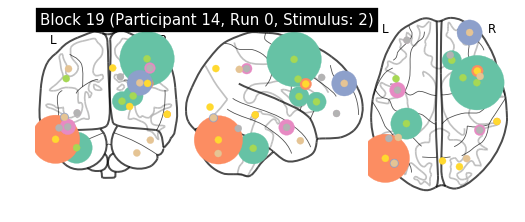

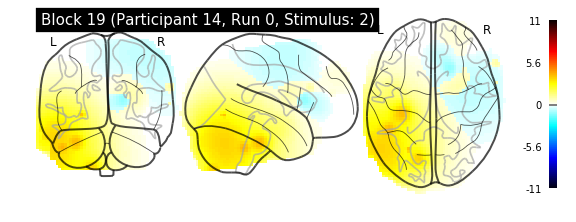

10/03/2018 16:51:56 Reconstruction Error (Frobenius Norm): 2.33098242e+03 out of 5.87585352e+03


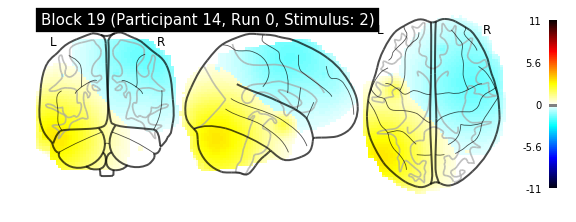

{'weights': tensor([[ 0.5699, -1.6931,  2.4734,  ..., -1.3887,  1.5497, -1.2905],
        [ 0.1108,  1.3988, -0.5415,  ...,  0.8110,  0.3950,  2.1716],
        [ 0.9630, -1.0103,  1.6247,  ...,  2.0798,  0.2291,  2.8704],
        ...,
        [ 1.1051,  0.3054,  5.2214,  ...,  1.6875, -0.4526,  1.2707],
        [ 1.1320,  0.6685,  3.8272,  ...,  2.2091,  0.5679, -0.7466],
        [ 1.5934,  0.8172,  0.8467,  ...,  0.9305, -2.2274,  2.3891]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0318,  0.0251,  0.0194,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 26.0986,  11.6404,  14.2244],
        [ 14.5561,  29.6333,   8.6939],
        [

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task %s' % block.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


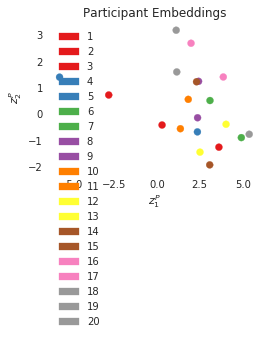

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


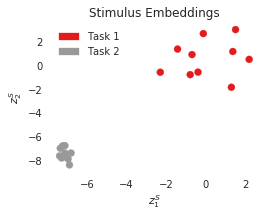

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

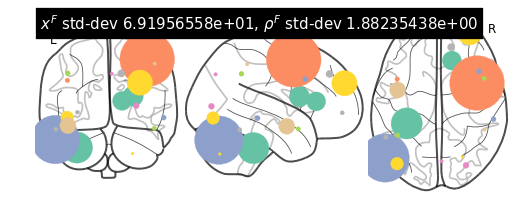

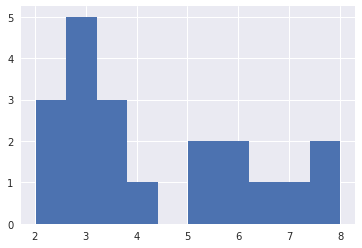

(<nilearn.plotting.displays.OrthoProjector at 0x7f33ea732978>,
 tensor([[ 26.1223,  11.9629,  14.2013],
         [ 14.5010,  29.4940,   9.1400],
         [-33.0072, -36.6171, -39.9557],
         [ 40.9147,   5.8885,  52.9443],
         [-43.0322,  10.0082,  30.7408],
         [ 58.2628, -32.1504,  -8.4746],
         [-55.7567, -72.9354, -31.5609],
         [ 43.1032,  18.2131,  32.5090],
         [ 29.3279, -80.6733,   4.0542],
         [  3.6463, -76.2947,  37.6432],
         [-42.6962, -49.0720,  38.2299],
         [ 48.4149,  10.6710, -19.7930],
         [-43.2099, -78.9282,  -8.3099],
         [ 33.2737,  59.2755,  28.2897],
         [ 25.5766, -71.8497, -46.2145],
         [-42.5295,  -1.4669, -16.9710],
         [ 48.8119, -43.1330,  48.2657],
         [ 13.7164,  43.5903,  38.0462],
         [-32.4691,  56.8900,  -2.8129],
         [-54.9837, -50.9625, -20.7663]]),
 tensor([ 6.0271,  5.8907,  6.8820,  8.0016,  3.0234,  3.2374,  7.7597,
          3.3078,  3.5791,  2.5335,  3.2098

In [14]:
dtfa.visualize_factor_embedding()

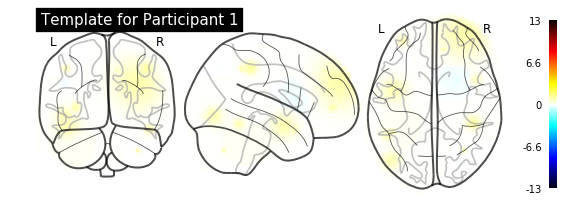

In [15]:
dtfa.plot_subject_template(1)

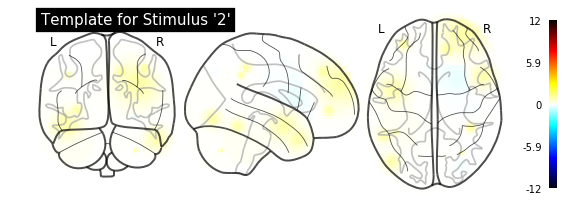

In [16]:
dtfa.plot_task_template('2')

In [17]:
def group_labeler(block):
    if block.subject <= 10:
        return 'Group 1'
    else:
        return 'Group 2'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


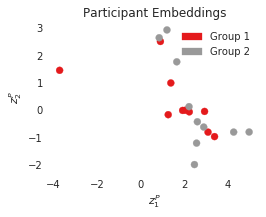

In [18]:
dtfa.scatter_subject_embedding(labeler=group_labeler)